In [14]:
import pandas as pd

In [13]:
methods = ['baseline', 'linear', 'pacmap', 'autoencoder']

In [18]:
def print_results(method): 
    if method == 'autoencoder':
        model_1 = f'{method}_binary.csv'
        model_2 = f'{method}_multiclass.csv'
    else:
        model_1 = f'{method}_binary.parquet'
        model_2 = f'{method}_multiclass.parquet'

    df_1 = pd.read_csv(f'/home/cristiano/ufpr/consolidado-tcc-resultados/results/metrics/{model_1}')
    df_2 = pd.read_csv(f'/home/cristiano/ufpr/consolidado-tcc-resultados/results/metrics/{model_2}')

    
    print(f'----------------------- {method} -----------------------')
    print(f'----------------------- Binary -----------------------')
    print(df_1)
    print('------------------------------------------------------')
    print(f'--------------------- Multiclass ---------------------')
    print(df_2)
    print('------------------------------------------------------')

In [19]:
for method in methods:
    print_results(method)

----------------------- baseline -----------------------
----------------------- Binary -----------------------
  Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0         baseline            53     0.907208       0.907579       0.686967   

   Test Precision  Test Recall  Training Time  
0         0.75694     0.628836      12.331866  
------------------------------------------------------
--------------------- Multiclass ---------------------
  Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0         baseline            53     0.742409       0.741968       0.730357   

   Test Precision  Test Recall  Training Time  
0        0.725768     0.741968     200.789694  
------------------------------------------------------
----------------------- linear -----------------------
----------------------- Binary -----------------------
   Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0               pca    

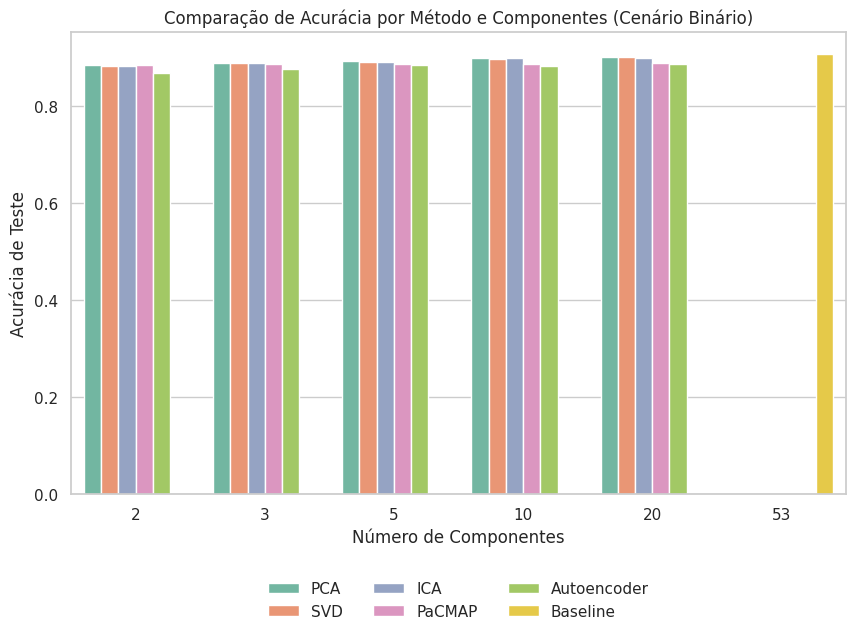

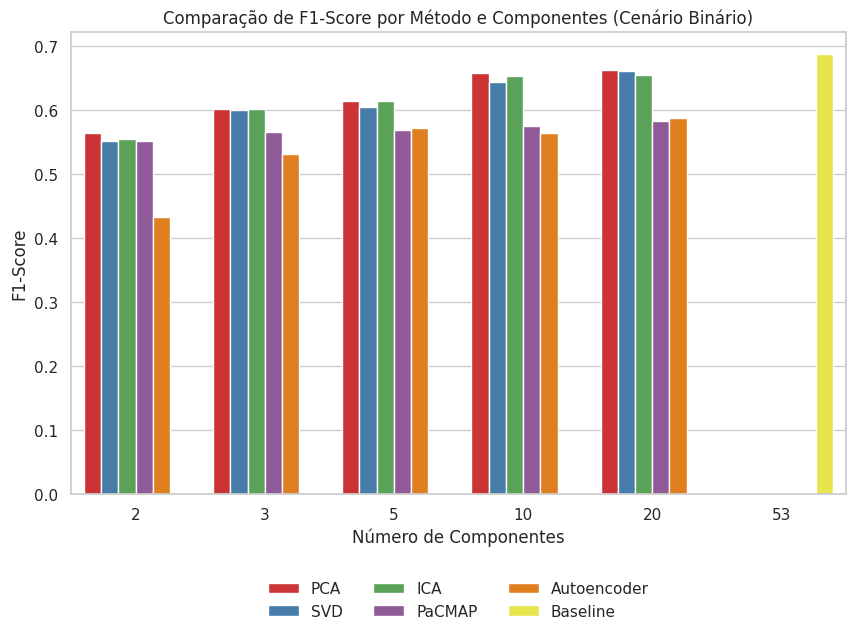

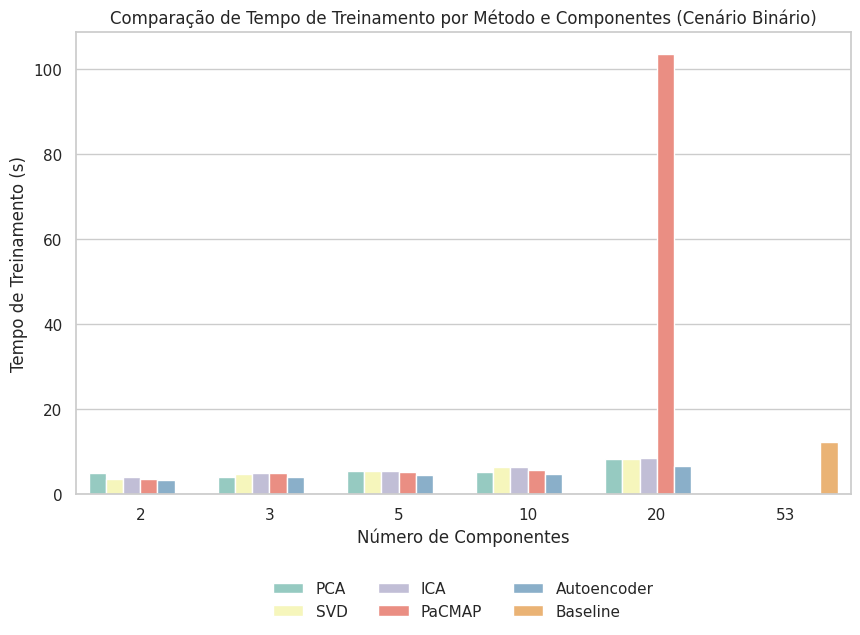

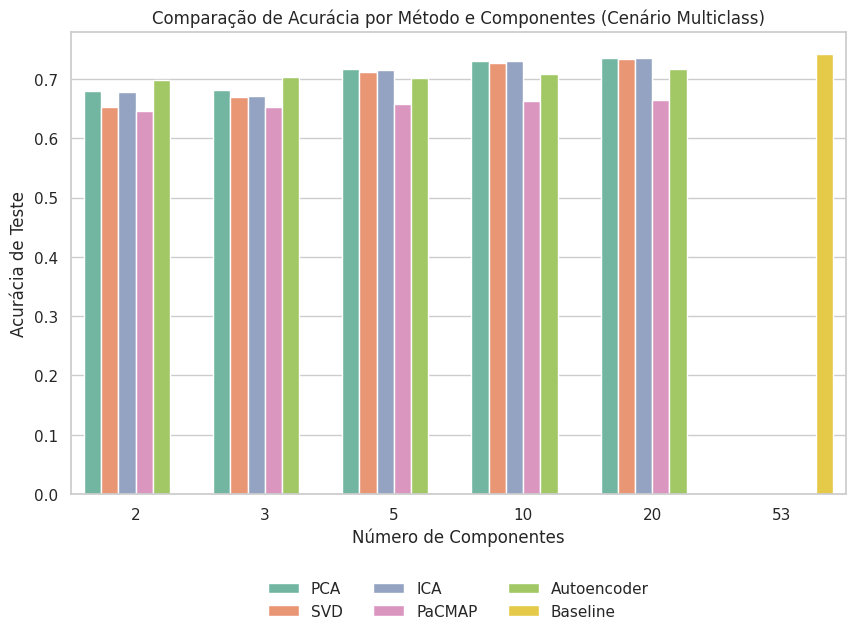

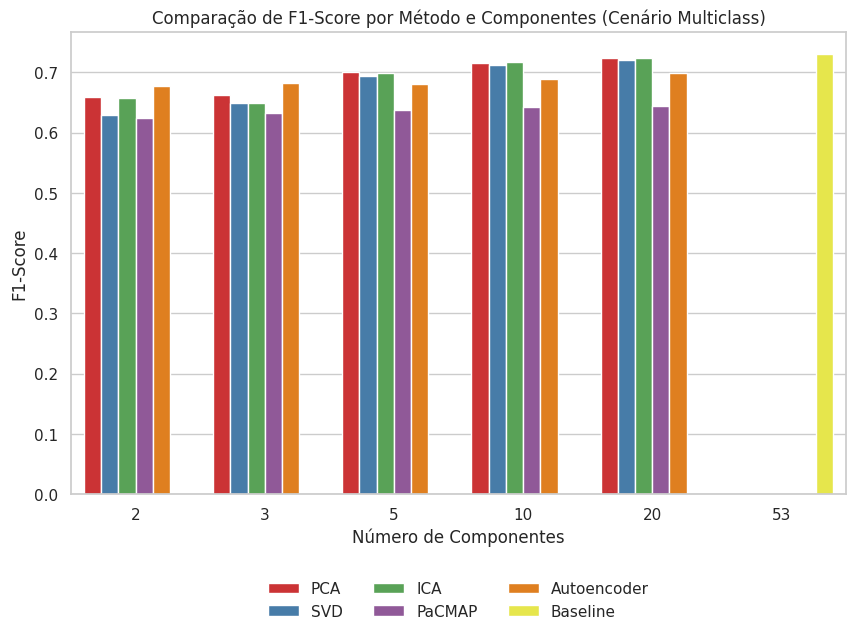

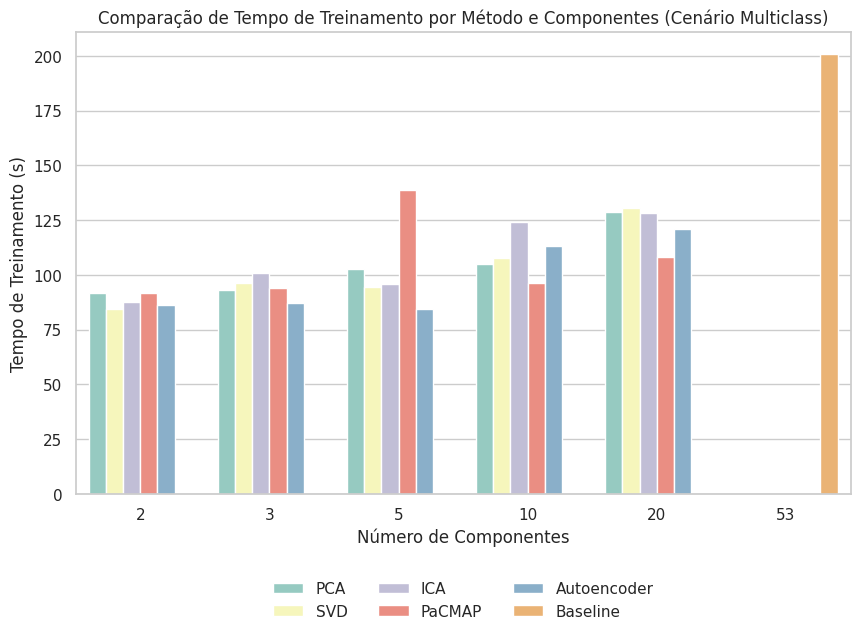

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir os dados dos resultados para o cenário binário
binary_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20],
    'CV Acurácia': [0.9072, 0.8839, 0.8902, 0.8920, 0.9006, 0.9013, 0.8825, 0.8902, 0.8906, 0.8980, 0.9003, 
                    0.8824, 0.8901, 0.8921, 0.8993, 0.8993, 0.8847, 0.8868, 0.8874, 0.8877, 0.8884, 
                    0.8674, 0.8783, 0.8847, 0.8829, 0.8877],
    'Test Acurácia': [0.9076, 0.8843, 0.8899, 0.8925, 0.9004, 0.9014, 0.8826, 0.8899, 0.8907, 0.8982, 0.9008, 
                     0.8824, 0.8900, 0.8922, 0.8995, 0.8995, 0.8846, 0.8862, 0.8870, 0.8876, 0.8883, 
                     0.8675, 0.8776, 0.8849, 0.8831, 0.8876],
    'F1-Score': [0.687, 0.564, 0.601, 0.614, 0.658, 0.662, 0.551, 0.599, 0.605, 0.644, 0.660, 
                 0.554, 0.601, 0.613, 0.653, 0.654, 0.551, 0.565, 0.568, 0.574, 0.582, 
                 0.433, 0.531, 0.572, 0.564, 0.587],
    'Tempo (s)': [12.33, 4.87, 3.97, 5.41, 5.26, 8.19, 3.45, 4.80, 5.33, 6.47, 8.24, 
                  3.95, 4.92, 5.35, 6.41, 8.48, 3.65, 4.92, 5.11, 5.66, 103.52, 
                  3.39, 3.90, 4.50, 4.79, 6.48]
}

# Definir os dados dos resultados para o cenário multiclass
multiclass_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20],
    'CV Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                    0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                    0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                    0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                    0.698650, 0.703136, 0.701800, 0.709036, 0.716195],
    'Test Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                      0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                      0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                      0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                      0.698650, 0.703136, 0.701800, 0.709036, 0.716195],
    'F1-Score': [0.730357, 0.658440, 0.661908, 0.700052, 0.716226, 0.723240,
                 0.629321, 0.648718, 0.693940, 0.712452, 0.719843,
                 0.658087, 0.648833, 0.699352, 0.716622, 0.723002,
                 0.624337, 0.632459, 0.637154, 0.642016, 0.643531,
                 0.677521, 0.681769, 0.680857, 0.689664, 0.698306],
    'Tempo (s)': [200.789694, 91.929897, 93.056267, 102.772533, 104.913334, 128.582052,
                  84.572860, 96.248809, 94.452910, 107.807619, 130.686455,
                  87.506785, 100.680907, 95.801662, 123.992938, 128.082325,
                  91.869106, 94.117072, 138.923416, 96.180689, 108.206234,
                  86.169872, 87.375637, 84.409931, 112.978923, 121.059005]
}

# Criar os DataFrames
df_binary = pd.DataFrame(binary_data)
df_multiclass = pd.DataFrame(multiclass_data)

# Plotar gráficos de barras comparativos para Acurácia, F1-Score e Tempo para o cenário binário
sns.set(style="whitegrid")

# Gráfico de Acurácia (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_binary, palette="Set2")
plt.title('Comparação de Acurácia por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de F1-Score (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_binary, palette="Set1")
plt.title('Comparação de F1-Score por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de Tempo de Treinamento (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_binary, palette="Set3")
plt.title('Comparação de Tempo de Treinamento por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Plotar gráficos de barras comparativos para Acurácia, F1-Score e Tempo para o cenário multiclass

# Gráfico de Acurácia (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_multiclass, palette="Set2")
plt.title('Comparação de Acurácia por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de F1-Score (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_multiclass, palette="Set1")
plt.title('Comparação de F1-Score por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de Tempo de Treinamento (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_multiclass, palette="Set3")
plt.title('Comparação de Tempo de Treinamento por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()
